# Task2 Benjamin Seeger
In this file I am working on task 2 of the lecture. As my birthday is in February, I have been assigned the following focus:
1. Performance
2. Explainability
3. Data Analysis  
> Accordingly, in the following implementation, efforts will be made primarily to reduce loss and increase accuracy. According to the prioritisation, the other aspects will of course also be considered.

In [1]:
# Test if the binder works
print("Hello to my task.")

Hello to my task.


# Implementation
In the following, the task is processed with the MNIST dataset. Individual subheadings that structure the code are intended to provide an overview. Notes on the implementation and justifications for the code are inserted at the appropriate places.
## Import of the MNIST-Dataset
The following lines import the dataset and other things that are helpful for later analyses, for example.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Loading the MNIST-Dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_validation, y_validation) = mnist.load_data()

Here we can print the first element of the training dataset. This will give us later a reference for the pre-processing process.

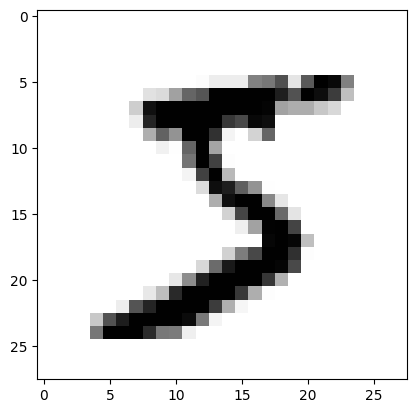

In [18]:
# Test: print the first Element in x_train to see if the dataset is aviable
plt.imshow(x_train[0], cmap = plt.cm.binary)

## Pre-processing
By preparing the data, the training process can be accelerated by scaling the data from the greyscale values 0 to 255 to 0 to 1. Later on this operations will end in a loss decreasment an so on a accuracy improvement.  
**Später durch auskommentieren nochmal prüfen, ob das wirklich der Fall ist. Geg. weiter alle Pixel auf entweder weiß oder schwarz setzen.**

In [ ]:
#x_train = x_train / 255.0 
#x_validation = x_validation / 255.0
#x_train = tf.keras.utils.normalize(x_train, axis = 1)
#x_validation = tf.keras.utils.normalize(x_validation, axis = 1)
import cv2

#read image as grey scale
#img_grey = cv2.imread(x_train, cv2.IMREAD_GRAYSCALE)

# define a threshold, 128 is the middle of black and white in grey scale
thresh = 128

# threshold the image
x_train = cv2.threshold(x_train, thresh, 255, cv2.THRESH_BINARY)[1]

#save image
#cv2.imwrite('D:/black-and-white.png',img_binary) 

By printing the first element of the training set again you can see how the greyscale valuas were fitted in the range of 0 to 1 in comparishment to the print before.

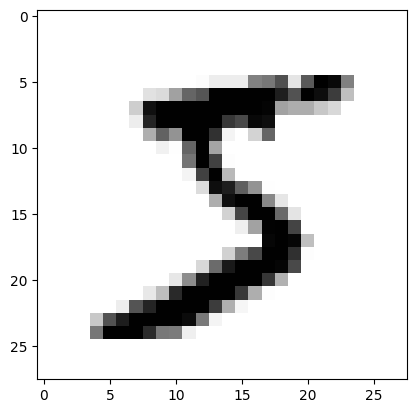

In [20]:
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [5]:
# reshape the data fi the input layer needs this
#x_train= x_train.reshape(-1, 28, 28, 1)
#x_validation = x_validation.reshape(-1, 28, 28, 1)

## Definition of the model architecture
**Hier erklären warum ich was verwendet habe. Zuerst noch rausfinden was für meinen Fokus am besten funktioniert. Siehe auch dem file mit meinen Notizen in diesem repository.**

In [10]:
# Definition of the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model an set the training parameters
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Print a summary of the network
#model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


## Train the network
See the following code.

In [11]:
import datetime
import os
logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
tensorboard_callback = tf.keras.callbacks.TensorBoard(logdir, histogram_freq=1)

model.fit(x_train, 
          y_train, 
          epochs=10, 
          shuffle=True, 
          callbacks=[tensorboard_callback],
          validation_data=(x_validation, y_validation)
)

2022-12-03 11:07:51.199176: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2675 - accuracy: 0.9216 - val_loss: 0.1368 - val_accuracy: 0.9586
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1105 - accuracy: 0.9656 - val_loss: 0.1049 - val_accuracy: 0.9671
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0749 - accuracy: 0.9762 - val_loss: 0.0926 - val_accuracy: 0.9720
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0554 - accuracy: 0.9823 - val_loss: 0.0872 - val_accuracy: 0.9725
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0421 - accuracy: 0.9862 - val_loss: 0.0895 - val_accuracy: 0.9726
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0319 - accuracy: 0.9894 - val_loss: 0.1006 - val_accuracy: 0.9739
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0252 - accuracy: 0.9919 - val_loss: 0.1020 - val_accuracy

## Evaluate the network

In [8]:
# Evaluate performance on validation set
#_, validation_acc = model.evaluate(x_validation, y_validation)
#print('validation accuracy:', validation_acc)

313/313 [==============================] - 4s 11ms/step


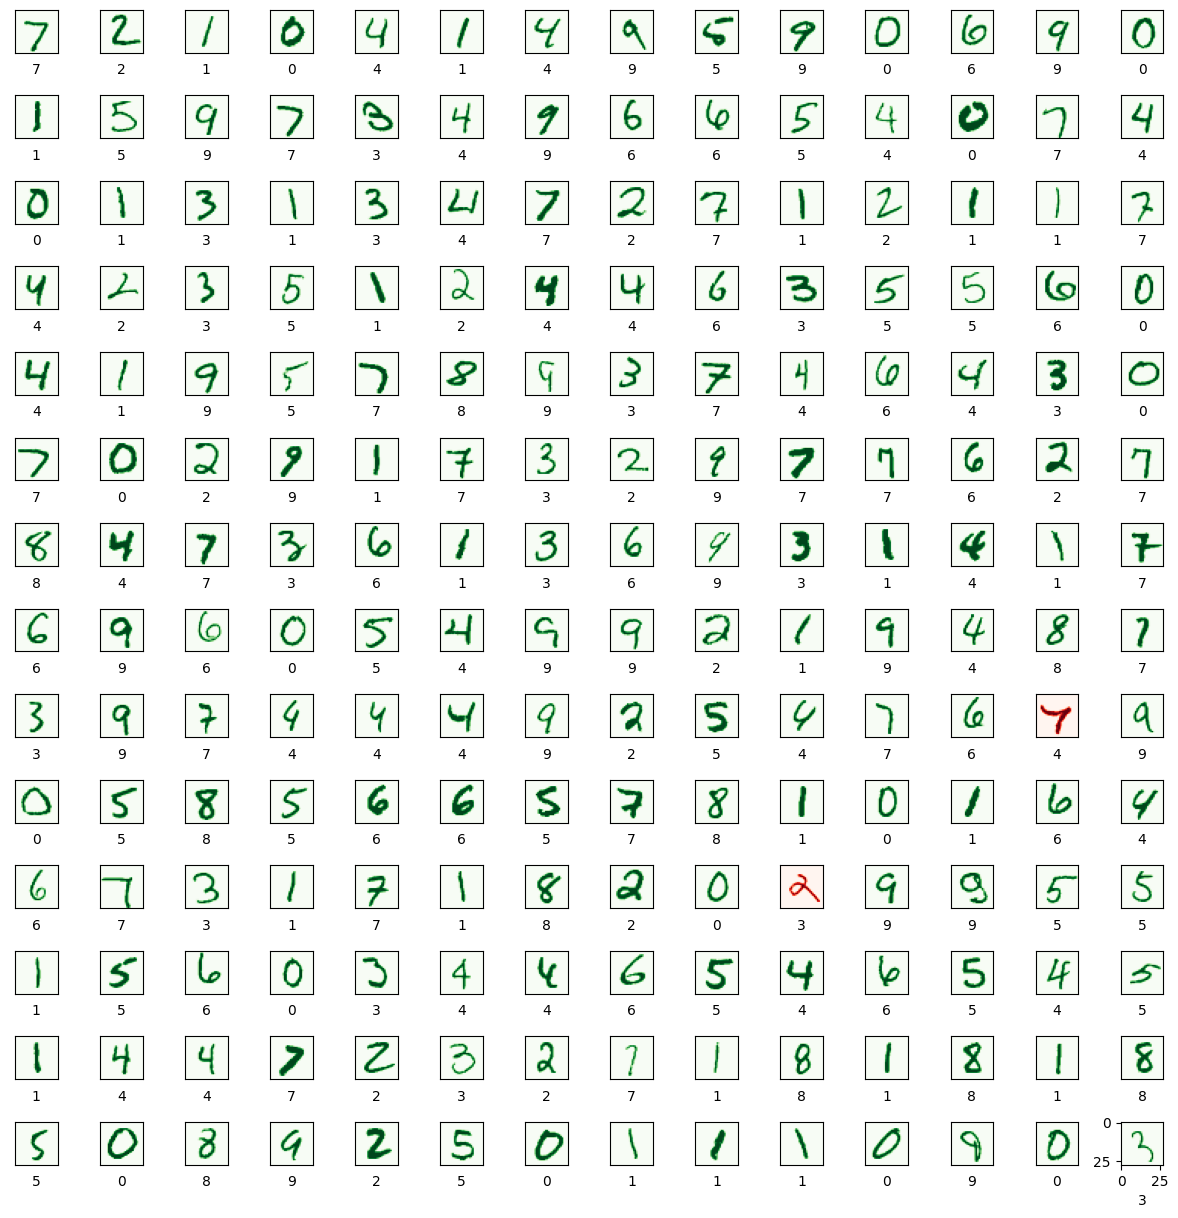

In [10]:
import math

predictions = model.predict([x_validation])
predictions = np.argmax(predictions, axis=1)

numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display): 
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation[plot_index].reshape((28, 28)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()